# **Computational Intelligence project_B 2023**

In [340]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math


from sklearn.preprocessing import MinMaxScaler
from numpy.linalg import norm


from deap import base
from deap import creator 
from deap import tools




## **Data Preparation**

### **Reading csv file and creating dataset**

In [475]:
path = r"C:\Users\Trinity\Documents\GA_Project\dataset-HAR-PUC-Rio.csv" 
dataset= pd.read_csv(path, delimiter=";", decimal = ",", low_memory=False) # Read the file
data = dataset.drop(["user","gender","age","how_tall_in_meters","weight","body_mass_index","Class"], axis=1)
label = dataset["Class"]
dataset


,user,gender,age,how_tall_in_meters,weight,body_mass_index,x1,y1,z1,x2,y2,z2,x3,y3,z3,x4,y4,z4,Class
0,debora,Woman,46,1.62,75,28.6,-3,92,-63,-23,18,-19,5,104,-92,-150,-103,-147,sitting
1,debora,Woman,46,1.62,75,28.6,-3,94,-64,-21,18,-18,-14,104,-90,-149,-104,-145,sitting
2,debora,Woman,46,1.62,75,28.6,-1,97,-61,-12,20,-15,-13,104,-90,-151,-104,-144,sitting
3,debora,Woman,46,1.62,75,28.6,-2,96,-57,-15,21,-16,-13,104,-89,-153,-103,-142,sitting
4,debora,Woman,46,1.62,75,28.6,-1,96,-61,-13,20,-15,-13,104,-89,-153,-104,-143,sitting
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165628,jose_carlos,Man,75,1.67,67,24.0,2,93,-148,-8,88,-100,15,120,-100,-189,-77,-160,walking
165629,jose_carlos,Man,75,1.67,67,24.0,-1,94,-147,-17,87,-99,17,121,-99,-190,-78,-158,walking
165630,jose_carlos,Man,75,1.67,67,24.0,-10,93,-143,-19,86,-104,0,114,-101,-185,-80,-153,walking
165631,jose_carlos,Man,75,1.67,67,24.0,-15,86,-152,-19,88,-117,-44,155,-25,-185,-84,-156,walking


In [476]:

scaler = MinMaxScaler(feature_range=(0,1))

scaled_data = scaler.fit_transform(data)


### **Mean vectors of every class**

In [477]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data["Class"] = label
mean_vectors = scaled_data.groupby('Class').mean()
mean_vectors

,0,1,2,3,4,5,6,7,8,9,10,11
Class,,,,,,,,,,,,
sitting,0.366705,0.419138,0.545830,0.449931,0.568754,0.716909,0.519283,0.581117,0.505974,0.827674,0.680005,0.759148
sittingdown,0.373142,0.457112,0.480843,0.414011,0.555831,0.608343,0.504431,0.598439,0.511138,0.753158,0.702511,0.801967
standing,0.367495,0.458642,0.489369,0.491653,0.702995,0.638789,0.518889,0.600316,0.513219,0.760258,0.720067,0.768590
standingup,0.368815,0.450662,0.476264,0.404896,0.544285,0.593578,0.488990,0.550286,0.496797,0.735012,0.708399,0.775540
walking,0.365761,0.462549,0.480816,0.312931,0.447328,0.413280,0.509756,0.624089,0.504906,0.749150,0.729366,0.750483


## **Genetic Algorithm**

In [478]:

creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

def attr():
    return random.random()


toolbox.register("attr_real", attr)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_real, 12)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

#EVALUATION FUNCTION
def eval(individual, vecs, c):
    cosines = []
    for m in mean_vectors.to_numpy():
        cos = np.dot(m,individual)/(norm(m)*norm(individual))
        cosines.append(cos)

    f = (cosines[0] + c*(1-(1/4)*(sum(cosines[1:4]))))/(1+c)
    return f,



#Genetic operators
toolbox.register("evaluate", eval, vecs=mean_vectors, c=0.1)
toolbox.register("mate", tools.cxBlend, alpha = 0.1)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=1.0, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=4)
toolbox.register("selectBest", tools.selBest, k=1, fit_attr='fitness')




C:\Users\Trinity\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "
C:\Users\Trinity\AppData\Local\Programs\Python\Python310\lib\site-packages\deap\creator.py:138: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  warnings.warn("A class named '{0}' has already been created and it "


### **Evolution**

In [479]:
avg_max = []
best_gens = []
best_score = 0
for i in range(10):
     
    #Population creation
    pop = toolbox.population(n=200)
    pop

    #Evalutation
    fitnesses = list(map(toolbox.evaluate, pop))

    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    

    # CXPB = crossover probability 
    # MUTPB = mutation probability
    CXPB, MUTPB = 0.6, 0.1

    fits = [ind.fitness.values[0] for ind in pop]
    
    #Find best score and average of all generations
    if max(fits) > best_score:
        best_score = max(fits)
        
    best_avg = sum(fits) / len(pop)

    #Find elit individualin this generation
    for ind, fit in zip(pop, fits):
        if fit == max(fits):
            elit = ind 
            
    #Find elit individual in all generations       
    for ind, fit in zip(pop, fits):
        if fit == best_score:
            b_elit = ind

    #Generations
    g = 0
    best_gen = g
    temp_max = []
    
    mean = sum(fits) / len(pop)
    print("-- Generation %i --" % g)
    print("  Min %s" % min(fits))
    print("  Max %s" % max(fits))
    print("  Avg %s" % mean)
    print("  Elit individual ", elit)
    
    
    while max(fits) < 1 and g < 100:
        
     
        temp_max.append(max(fits))
        g = g + 1
        print("-- Generation %i --" % g)
        
        #Select next generation individuals
        offsprings = toolbox.select(pop, len(pop))
        
        #Clone selected individuals
        offsprings = list(map(toolbox.clone, offsprings)) 

        #Crossover and mutation on offsprings
        for child1, child2 in zip(offsprings[::2], offsprings[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values
    

        for mutant in offsprings:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values
            
    
        #Evaluate the individuals with an invalid fitness
        invalid_ind = [ind for ind in offsprings if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
                
        # Replace old population with offsprings
        pop[:] = offsprings
    

        fits = [ind.fitness.values[0] for ind in pop]
        
    
        #Find elit individual in this generation
        for ind, fit in zip(pop, fits):
            if fit == max(fits):
                elit = ind    
   
        if max(fits) > best_score:
            best_score = max(fits)
            
        #Find general elit endividual     
        for ind, fit in zip(pop, fits):
            if fit == best_score:
                b_elit = ind
        
        #Generation of best average score
        temp_avg = sum(fits) / len(pop)
        if temp_avg > best_avg:
            best_avg = temp_avg
            best_gen = g
    
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
    
        """
        req = mean + mean/100000
    
        if n_mean < req:
        evolution = False
        else :
        mean = n_mean
        """ 
   

        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
        print("  Elit individual ", elit)

    avg_max.append(temp_max)
    best_gens.append(best_gen)
    
    



    


-- Generation 0 --
  Min 0.6856880555055089
  Max 0.8991188108712261
  Avg 0.8044267363508236
  Elit individual  [0.2945142361308727, 0.193505794261024, 0.42122144567226305, 0.6095223905972637, 0.5174921517188725, 0.5758669806961965, 0.37193790021662865, 0.9105847382279691, 0.5005949847075946, 0.989621182346829, 0.9834529952866672, 0.6655372611037267]
-- Generation 1 --
  Min 0.6381415657055443
  Max 0.9141853371104757
  Avg 0.8592747625482763
  Std 0.0339808952156469
  Elit individual  [0.4127135992836477, 0.5357334647523427, 0.7521218536268253, 0.5466909048323143, 0.6414700475496692, 0.6295842017665587, 0.5942928381896465, 0.8179206141106148, 0.8176572849534989, 0.8526258417453376, 0.8861711875491407, 0.5890804379818494]
-- Generation 2 --
  Min 0.5715478759491557
  Max 0.9245950945913962
  Avg 0.8882133039870226
  Std 0.03207379027296104
  Elit individual  [0.43915682598663236, 0.44104427711714306, 0.5502173508769692, 0.5198072490724364, 0.6503221832274796, 0.6633370568353243, 0.584

  Min 0.5209527742718745
  Max 0.9320512275010632
  Avg 0.9244019640802448
  Std 0.03977113068654794
  Elit individual  [0.37879600266868996, 0.4255861329611561, 0.5499697921595603, 0.4584995542151244, 0.5761018029378606, 0.7361103280270462, 0.5285470276867267, 0.5896305230717617, 0.514663043042996, 0.8473056699358037, 0.6851932448025978, 0.7664196725589916]
-- Generation 31 --
  Min 0.6599605668915007
  Max 0.9320517878305155
  Avg 0.9265093806932547
  Std 0.028630902467879398
  Elit individual  [0.378536133168503, 0.4252181219100967, 0.5501390574051745, 0.4588373102363371, 0.5758855289688758, 0.7338541983034153, 0.528795132707673, 0.5894870243453177, 0.5146702488629843, 0.847148982643555, 0.6850874538806118, 0.7667855663903919]
-- Generation 32 --
  Min 0.6362886961357682
  Max 0.9320517878305155
  Avg 0.9267297365567976
  Std 0.029585940105515005
  Elit individual  [0.378536133168503, 0.4252181219100967, 0.5501390574051745, 0.4588373102363371, 0.5758855289688758, 0.7338541983034153,

  Min 0.46830573947766035
  Max 0.9320525622510343
  Avg 0.9252295504865894
  Std 0.03993351648568564
  Elit individual  [0.37840267637470215, 0.4251755208283643, 0.5501365575685573, 0.4587476964857337, 0.5758312626550439, 0.7350814678063157, 0.5288139977064387, 0.5895698040775746, 0.5145931719193332, 0.8469936336984301, 0.6852239684930449, 0.7675652977030234]
-- Generation 54 --
  Min 0.7037431006061855
  Max 0.9320525646681089
  Avg 0.9268727936573024
  Std 0.027266644275405098
  Elit individual  [0.37840462833098476, 0.4251685235189766, 0.5501376035987318, 0.45874198310852216, 0.5758125949762107, 0.7350388184320237, 0.528812467028245, 0.5895556199528422, 0.5145899982499518, 0.8469902323379233, 0.6852170583130076, 0.7675630374759806]
-- Generation 55 --
  Min 0.5759946956051798
  Max 0.9320525682258469
  Avg 0.9257026303466392
  Std 0.032425330603996855
  Elit individual  [0.3784047141663204, 0.425168928597697, 0.5501376410508699, 0.45874196220035085, 0.5758178249879908, 0.7350693527

  Min 0.5520647085102824
  Max 0.932052580365421
  Avg 0.9236349740669593
  Std 0.040350659141405405
  Elit individual  [0.37840178714935857, 0.425168262324066, 0.550137762589795, 0.4587442614282747, 0.5758174635993983, 0.7350923932677258, 0.5288141007491199, 0.5895400406819873, 0.5145928539123599, 0.8469710521321311, 0.685221221108186, 0.7675658042535357]
-- Generation 77 --
  Min 0.649962779122586
  Max 0.9320525804220342
  Avg 0.9280758123932668
  Std 0.02823204436531754
  Elit individual  [0.3784017807562323, 0.42516824432877104, 0.5501378720691539, 0.45874424185405216, 0.5758171556941976, 0.7350912874890891, 0.5288140990893887, 0.5895395941395749, 0.51459265914124, 0.8469713213697626, 0.685220968932622, 0.7675658188156042]
-- Generation 78 --
  Min 0.4078025491781933
  Max 0.9320525804750945
  Avg 0.9253991629179018
  Std 0.04329712700142648
  Elit individual  [0.37840177882770426, 0.4251682470211328, 0.5501377444247084, 0.4587442603385426, 0.5758170061537524, 0.7350923391229351, 

  Min 0.6473454548541706
  Max 0.9320607449367267
  Avg 0.9254344529213105
  Std 0.03491191910926002
  Elit individual  [0.3784017890654771, 0.42516813706248774, 0.5597182514755636, 0.45874434698099226, 0.5758167757570015, 0.7350922434391038, 0.5288140844265845, 0.5895379599355014, 0.5145927280490107, 0.8469711769589847, 0.6852213370891118, 0.7675657742686547]
-- Generation 99 --
  Min 0.608835516221252
  Max 0.9320607449431058
  Avg 0.9231088624043366
  Std 0.04233345867353146
  Elit individual  [0.37840178932238083, 0.4251681368808537, 0.5597070030597061, 0.45874434514497425, 0.57581677839482, 0.73509224279863, 0.5288140844993466, 0.5895379237015341, 0.5145927282716569, 0.8469711791055721, 0.6852213238034293, 0.7675657698264629]
-- Generation 100 --
  Min 0.6477460178231134
  Max 0.9320607449511001
  Avg 0.9285319690224746
  Std 0.027100830625902718
  Elit individual  [0.37840178907307326, 0.4251681370548161, 0.5597083635019728, 0.4587443460732359, 0.5758167755729421, 0.7350922430607

  Min 0.48782036289169334
  Max 0.9320403991022692
  Avg 0.9240783478607666
  Std 0.04290551706566714
  Elit individual  [0.39022692556894034, 0.43786533147030465, 0.5701152027160019, 0.4637340919357966, 0.5803586535495563, 0.7470162256826188, 0.5384223095750142, 0.5974507912267637, 0.5233719278043223, 0.8655856612340779, 0.7023539465300406, 0.7774777947092528]
-- Generation 20 --
  Min 0.584518899335341
  Max 0.932042143628334
  Avg 0.9266109276339936
  Std 0.034363362979836755
  Elit individual  [0.39066337187766836, 0.4377678750694488, 0.5688888271463237, 0.4639167327590545, 0.5854870826829629, 0.7485846123077063, 0.5353717463567491, 0.5996138808940433, 0.5230163514651505, 0.8629327350093454, 0.7026086356684327, 0.7762207935296308]
-- Generation 21 --
  Min 0.4571674448948678
  Max 0.9320441990113771
  Avg 0.9225413395856329
  Std 0.05262428284775884
  Elit individual  [0.3906638424694691, 0.4377553200747519, 0.5684582296934285, 0.46428468260918393, 0.5855464044326588, 0.74820695003

  Min 0.5383931268849886
  Max 0.9320535109644243
  Avg 0.924490660908137
  Std 0.042355286143082815
  Elit individual  [0.38782992716314674, 0.43750868315954, 0.5689284923205524, 0.46412332451244637, 0.5843573633702499, 0.7499362153471962, 0.5383263643240545, 0.5992904993407437, 0.5233693156444829, 0.8631738653170054, 0.7017945617133102, 0.7819375507872957]
-- Generation 42 --
  Min 0.5445821634926129
  Max 0.9320535254661977
  Avg 0.9244766710223883
  Std 0.040678380402196804
  Elit individual  [0.3878300864568642, 0.43750592895139073, 0.5688487247748979, 0.4641153998799007, 0.5842897021809402, 0.7499625970517813, 0.5385909903546229, 0.5993027941432092, 0.5235017171498751, 0.8632680864454894, 0.7018242398418001, 0.7820367574428277]
-- Generation 43 --
  Min 0.620118408739292
  Max 0.9320535254661977
  Avg 0.9244779385445845
  Std 0.0383372053277551
  Elit individual  [0.3878300864568642, 0.43750592895139073, 0.5688487247748979, 0.4641153998799007, 0.5842897021809402, 0.74996259705178

  Min 0.5493338835091978
  Max 0.9320536128546788
  Avg 0.9211639857666944
  Std 0.05427257772773234
  Elit individual  [0.38783001972538994, 0.4374976072617911, 0.5689426791527812, 0.46412699705023286, 0.5843920603643018, 0.749936043438229, 0.5385634835807285, 0.5993075746911507, 0.5234107362592374, 0.8632140067713984, 0.7017879944709771, 0.7820908201857393]
-- Generation 64 --
  Min 0.40677647377172194
  Max 0.9320536128546788
  Avg 0.9226677322281757
  Std 0.04630543937688374
  Elit individual  [0.38783001972538994, 0.4374976072617911, 0.5689426791527812, 0.46412699705023286, 0.5843920603643018, 0.749936043438229, 0.5385634835807285, 0.5993075746911507, 0.5234107362592374, 0.8632140067713984, 0.7017879944709771, 0.7820908201857393]
-- Generation 65 --
  Min 0.5670833799909216
  Max 0.9320536131355215
  Avg 0.9236494943133366
  Std 0.03817704373167033
  Elit individual  [0.38782965052959706, 0.4374977445607142, 0.5689430974371975, 0.464127329794098, 0.5843914842631329, 0.749937575134

  Min 0.74745066711366
  Max 0.9320536155353353
  Avg 0.9260200598762124
  Std 0.024772190386425037
  Elit individual  [0.3878296462918607, 0.43749759997902116, 0.5689431095393753, 0.46412957030108287, 0.5843920048488884, 0.7499387025769014, 0.5385610208988472, 0.5993077405550618, 0.5234104102524166, 0.8632154221148618, 0.7017856199151912, 0.7820905817524897]
-- Generation 97 --
  Min 0.6785058995029337
  Max 0.9320536155357273
  Avg 0.9289921585691054
  Std 0.021095319653374356
  Elit individual  [0.3878296465652961, 0.43749760022735645, 0.5689431098881408, 0.46412956899115543, 0.5843920045103533, 0.7499387022059962, 0.5385610719175609, 0.5993077405379864, 0.5234104099767743, 0.8632154228057755, 0.7017856239084322, 0.7820905822130642]
-- Generation 98 --
  Min 0.7588647178371376
  Max 0.9320536155370808
  Avg 0.9285166154114657
  Std 0.01803379011882286
  Elit individual  [0.38782964680169046, 0.43749759993479626, 0.5689431091719405, 0.4641295681663063, 0.5843920027393631, 0.749938702

  Min 0.36656857484789457
  Max 0.9320658518496615
  Avg 0.9230453318730416
  Std 0.05319340526643036
  Elit individual  [0.33586050916963944, 0.38122224243682223, 0.5030417267102912, 0.41311876277945586, 0.517950738224881, 0.6657060485525291, 0.47684905273757217, 0.5324208764968763, 0.46333261787463775, 0.7638178811455539, 0.6202722280184373, 0.6945815963459786]
-- Generation 27 --
  Min 0.7175568684055066
  Max 0.9320659085333678
  Avg 0.9234947359178202
  Std 0.03455420368566546
  Elit individual  [0.3357162808151973, 0.3814043440464798, 0.502929118026689, 0.4134564884350411, 0.5181571498856481, 0.6656322624440382, 0.4770774186674877, 0.5319040694582536, 0.4632134839700621, 0.763502589050792, 0.6200400880200801, 0.6938672092902372]
-- Generation 28 --
  Min 0.5298677884105661
  Max 0.9320659505059988
  Avg 0.9229426838216866
  Std 0.048206919452276564
  Elit individual  [0.3356511576074836, 0.38108420854545777, 0.5030519125085591, 0.4131023093157247, 0.5179507988664545, 0.6657097936

  Min 0.43971570643865027
  Max 0.9320660658486111
  Avg 0.9256333339444527
  Std 0.04376346790085208
  Elit individual  [0.33567267783061816, 0.38127498206773686, 0.5030893489485536, 0.41325924836939487, 0.5184118954723482, 0.6656135710475402, 0.4770252595693283, 0.5321614762545059, 0.4632908941486735, 0.764021037258878, 0.6203134978577901, 0.6938817212685753]
-- Generation 49 --
  Min 0.6612283922648953
  Max 0.9320660658486111
  Avg 0.9277860730045974
  Std 0.0254958380525482
  Elit individual  [0.33567267783061816, 0.38127498206773686, 0.5030893489485536, 0.41325924836939487, 0.5184118954723482, 0.6656135710475402, 0.4770252595693283, 0.5321614762545059, 0.4632908941486735, 0.764021037258878, 0.6203134978577901, 0.6938817212685753]
-- Generation 50 --
  Min 0.49843800225523105
  Max 0.9320660660102835
  Avg 0.9259888156686411
  Std 0.036343113906705145
  Elit individual  [0.33567241275397186, 0.3812772364505428, 0.5030914196161275, 0.4132571336491998, 0.5183969143984105, 0.66561325

  Min 0.3827702480495616
  Max 0.9320660677889258
  Avg 0.9154523542930145
  Std 0.07104088442914572
  Elit individual  [0.3356723449220473, 0.3812756995746128, 0.503091440624492, 0.4132570278534067, 0.5184108226676818, 0.665612326056906, 0.477025318562171, 0.5321655092688689, 0.46328779440529794, 0.764028866238057, 0.6203210538104563, 0.6938758896091926]
-- Generation 81 --
  Min 0.5555686310532375
  Max 0.9320660677860784
  Avg 0.92183335760379
  Std 0.04866670720153751
  Elit individual  [0.3356723627188938, 0.3812757194162382, 0.5030914470608393, 0.4132570843398181, 0.5184108579868038, 0.665612324880009, 0.4770253263659353, 0.5321655753886212, 0.46328779016128824, 0.7640285499576827, 0.6203210543848474, 0.6938759169157305]
-- Generation 82 --
  Min 0.6136787128842036
  Max 0.9320660677900033
  Avg 0.9232709174770842
  Std 0.037439728180737146
  Elit individual  [0.3356723586386861, 0.3812756251777024, 0.5030914463848388, 0.4132570063035887, 0.5184108289123023, 0.6656123282875169, 0

  Min 0.466194403204734
  Max 0.9319026841327365
  Avg 0.923516555872299
  Std 0.040649720242060906
  Elit individual  [0.3680685840125355, 0.4390347596668996, 0.5823767231701035, 0.4502267070080067, 0.575648351170924, 0.7526599889500997, 0.5384286367176934, 0.5693314191106497, 0.516341718069476, 0.8721755872141194, 0.7000291174819168, 0.7765906488750535]
-- Generation 10 --
  Min 0.46709263191336653
  Max 0.9319576862350554
  Avg 0.9190110453567651
  Std 0.057622290880344505
  Elit individual  [0.3671029765651457, 0.4390603226649049, 0.5727157252114652, 0.4584384087018656, 0.595609526230598, 0.752479321453422, 0.5495789695280904, 0.5841713196657535, 0.5402973816645871, 0.8708347769627576, 0.6982732362864468, 0.7767062193374634]
-- Generation 11 --
  Min 0.7921670608350833
  Max 0.9320288103849067
  Avg 0.9294495828157919
  Std 0.014393716061312912
  Elit individual  [0.38107754555976653, 0.42952902035084267, 0.5829548887757867, 0.4731157617171648, 0.5881333113778119, 0.748127534707186

  Min 0.5848107777017569
  Max 0.9320661916290646
  Avg 0.9201612155445722
  Std 0.04645945707287362
  Elit individual  [0.3813117880034243, 0.4332879742755883, 0.5743852637392672, 0.470488706917842, 0.5896815335918265, 0.755332512140672, 0.5424658390342483, 0.6033262958568845, 0.5269159880678683, 0.8686603239091426, 0.7058537260938281, 0.7889843870242159]
-- Generation 36 --
  Min 0.7716318928744879
  Max 0.9320661944158263
  Avg 0.9277618675436572
  Std 0.020138549053818695
  Elit individual  [0.38124570166503524, 0.4331752550451522, 0.5743516675583271, 0.4704888550033659, 0.5897695916784788, 0.7553119577298132, 0.5425230167724138, 0.603329508558218, 0.5269309013962185, 0.8686907443823686, 0.7055775472965512, 0.7889647085360347]
-- Generation 37 --
  Min 0.7800481800610924
  Max 0.9320661976721558
  Avg 0.9271960982952859
  Std 0.02212232337232552
  Elit individual  [0.38120900954339637, 0.4332523579445122, 0.5743143437017914, 0.4704300016409427, 0.589682801921109, 0.7553261960795231

  Min 0.7086172205801203
  Max 0.9320662196752739
  Avg 0.9285256247121599
  Std 0.020887610305077693
  Elit individual  [0.3813207984600254, 0.4332683545094706, 0.5742723700144058, 0.47042538475935064, 0.5896988768642527, 0.7553284625322451, 0.5424826457150072, 0.603327127146491, 0.5268748780093181, 0.8686500074476661, 0.7056176952649591, 0.788956615581264]
-- Generation 58 --
  Min 0.5359777408684615
  Max 0.9320662197839987
  Avg 0.922989074844793
  Std 0.04761930672266745
  Elit individual  [0.3813180755601719, 0.43326465790241303, 0.5742715035188629, 0.4704254462243166, 0.58969380930629, 0.7553284814671328, 0.5424829462779914, 0.6033273452084799, 0.5268698589053866, 0.8686603844322333, 0.7056178405531448, 0.788956638988799]
-- Generation 59 --
  Min 0.6385667385166045
  Max 0.9320662198293846
  Avg 0.9262074268065049
  Std 0.03275872654656948
  Elit individual  [0.3813196684427071, 0.433264753276869, 0.5742721469430134, 0.4704255824559313, 0.5896906042859668, 0.7553286541776285, 0

  Min 0.6466944156418825
  Max 0.9320662200478874
  Avg 0.9228473205004285
  Std 0.037992242005180865
  Elit individual  [0.3813210760718683, 0.43326551280654607, 0.574271210884256, 0.4704254204335029, 0.5896897729024206, 0.7553285538368755, 0.5424826820036893, 0.6033273696102899, 0.5268703341910473, 0.8686582201009952, 0.7056177819479257, 0.7889566302810602]
-- Generation 81 --
  Min 0.42335471183526274
  Max 0.9320662200485866
  Avg 0.9245046705480704
  Std 0.04672814217685817
  Elit individual  [0.3813210757138039, 0.4332654969362396, 0.5742712068361089, 0.47042542105753954, 0.5896897257916835, 0.755328555995032, 0.542482694820404, 0.6033273712250217, 0.5268703465755133, 0.8686582627667128, 0.7056177667787635, 0.7889566305893085]
-- Generation 82 --
  Min 0.5679824084821674
  Max 0.9320662200485866
  Avg 0.9218710442480387
  Std 0.0472437464604478
  Elit individual  [0.3813210757138039, 0.4332654969362396, 0.5742712068361089, 0.47042542105753954, 0.5896897257916835, 0.75532855599503

  Min 0.4515339579275746
  Max 0.9237158017793119
  Avg 0.8932155351806714
  Std 0.05117678811877213
  Elit individual  [0.28626554268257076, 0.3895019747320731, 0.657061770370276, 0.38300075244620746, 0.5993088778638125, 0.7140840784000206, 0.6809768932178486, 0.5981175139212531, 0.7107474777158784, 0.7865291872173252, 0.6904194371697705, 0.7227630915719863]
-- Generation 4 --
  Min 0.38842181439694107
  Max 0.928190420510139
  Avg 0.9046760682154908
  Std 0.05223206463286307
  Elit individual  [0.4186155325779759, 0.4179726594174641, 0.4671760317491712, 0.4917121547170986, 0.46916978056679787, 0.674301154831439, 0.6070452411324816, 0.5731444325741986, 0.4911111676411251, 0.7718593754216666, 0.6743070821740872, 0.6578028290483549]
-- Generation 5 --
  Min 0.4726023869196978
  Max 0.9300554540881684
  Avg 0.9142619061550444
  Std 0.04041216790616776
  Elit individual  [0.2714948986647472, 0.4213027966855174, 0.455690580173845, 0.3884304455415387, 0.5042513746349496, 0.6574004111481657,

  Min 0.36052935764160027
  Max 0.932047072952781
  Avg 0.92399592258018
  Std 0.04953639036991721
  Elit individual  [0.3661364068104498, 0.41800572309838724, 0.5383782447801231, 0.44489469440732654, 0.5518324589551761, 0.710573006760392, 0.5122385667715836, 0.5701672176790429, 0.49842007447712827, 0.8175629869911165, 0.6691582105421326, 0.7405332243065327]
-- Generation 27 --
  Min 0.6188812593394032
  Max 0.9320476604952638
  Avg 0.9230028547524287
  Std 0.04020605713500124
  Elit individual  [0.3659962198880962, 0.41789342583241323, 0.5388941663751842, 0.44285169285592574, 0.5516991830258254, 0.7102929840181873, 0.5116934647316926, 0.5700097878730179, 0.4985395561233045, 0.8176436509215288, 0.6689685975494999, 0.7400533873032725]
-- Generation 28 --
  Min 0.6834263682140158
  Max 0.9320485070231778
  Avg 0.9241226531083534
  Std 0.03193950652496546
  Elit individual  [0.3663377123306701, 0.41728595560608617, 0.5385184323777074, 0.44391707233730704, 0.5516822228679714, 0.70993654600

  Min 0.4417594218652596
  Max 0.9320503241246485
  Avg 0.9219982519057228
  Std 0.04713847197554555
  Elit individual  [0.36622055007430887, 0.4171270323089605, 0.5399232183793591, 0.44287816531657137, 0.5519695968268624, 0.7102209015772697, 0.5118176865648498, 0.5699825117400179, 0.49717151363003154, 0.8176232062340469, 0.6676932249318221, 0.7398998488691614]
-- Generation 49 --
  Min 0.48736150872618444
  Max 0.9320503283904681
  Avg 0.9202444377677486
  Std 0.06340333491807174
  Elit individual  [0.36622176821883656, 0.41712820943339124, 0.539924124316088, 0.4428382500349707, 0.5519724686503538, 0.7102161655311819, 0.5118176005378348, 0.569994410186296, 0.4971317555258236, 0.8176260828807911, 0.6676899817207349, 0.7399000784621768]
-- Generation 50 --
  Min 0.5600351784898563
  Max 0.9320503318170239
  Avg 0.9277274165700317
  Std 0.033405184785030864
  Elit individual  [0.3662160287760681, 0.41712922108814393, 0.5399243649359146, 0.44289673441339716, 0.5519668063959882, 0.71022268

  Min 0.20728893772549276
  Max 0.9320503423031381
  Avg 0.9192593579009831
  Std 0.06977613931105531
  Elit individual  [0.3662161235408646, 0.4171269835275493, 0.5399250111647722, 0.4428800461059243, 0.5519717436092909, 0.7102233401115907, 0.5118201560737546, 0.5699991339356697, 0.4971268451243541, 0.8176268074123838, 0.6676878332233414, 0.7398995842149946]
-- Generation 71 --
  Min 0.605998273118828
  Max 0.9320503423487507
  Avg 0.9239385705838085
  Std 0.03965894784603216
  Elit individual  [0.3662161321090701, 0.4171269148256578, 0.5399252082549966, 0.44288126626747526, 0.5519717167793999, 0.710223255159147, 0.5118202566437441, 0.570000148991187, 0.4971277102358598, 0.8176267749324648, 0.6676878746961483, 0.739899569472864]
-- Generation 72 --
  Min 0.47908861283352966
  Max 0.9320503423838686
  Avg 0.9242695756840881
  Std 0.04251536007468994
  Elit individual  [0.36621609291044044, 0.41712693691567304, 0.5399249792447646, 0.4428800730081, 0.551971737493707, 0.7102233112164057, 

  Min 0.5235337273820041
  Max 0.9320503428016867
  Avg 0.9213818158274091
  Std 0.05559961137258589
  Elit individual  [0.36621612469730036, 0.4171268388289614, 0.5399251310005093, 0.44288155377729405, 0.551971816347093, 0.7102233479128255, 0.5118200576103399, 0.5700006342237537, 0.49712702579624424, 0.817626817562742, 0.6676878041662575, 0.7398996043327735]
-- Generation 93 --
  Min 0.40873619126927263
  Max 0.9320503428030777
  Avg 0.9219487199295284
  Std 0.05388663271977552
  Elit individual  [0.366216123630921, 0.4171268385934809, 0.539925131020293, 0.4428814894989336, 0.5519718143304206, 0.7102233428531214, 0.5118200492033853, 0.5700006353811007, 0.49712700757621625, 0.8176268180982829, 0.6676878045853839, 0.7398996047094093]
-- Generation 94 --
  Min 0.3671261314454319
  Max 0.9320503428030777
  Avg 0.9233054971084558
  Std 0.051512676182727986
  Elit individual  [0.366216123630921, 0.4171268385934809, 0.539925131020293, 0.4428814894989336, 0.5519718143304206, 0.710223342853121

  Min 0.7675785317657707
  Max 0.9320234566305539
  Avg 0.9283248762743627
  Std 0.019745180067748138
  Elit individual  [0.3696223155458402, 0.41225550271885003, 0.5468843073177369, 0.45402960654000735, 0.5627415522379428, 0.7126468223284657, 0.5133702072030886, 0.5825142110197199, 0.5064236429111898, 0.8265464350937446, 0.6586392026488894, 0.7423368916610591]
-- Generation 14 --
  Min 0.6571483999256346
  Max 0.9320422219135136
  Avg 0.9274896816483902
  Std 0.030130602266609532
  Elit individual  [0.3681375732470064, 0.41104156474246917, 0.5417406710565323, 0.4434996749108109, 0.5703608591165628, 0.7239562608818855, 0.5119710650751712, 0.5764058580156425, 0.5057348407847784, 0.836334506510885, 0.6764096451436288, 0.7506324666653296]
-- Generation 15 --
  Min 0.7770974324350324
  Max 0.9320531792896201
  Avg 0.92707462303311
  Std 0.022045750864067504
  Elit individual  [0.37510342931075036, 0.4195684229506663, 0.5565335552529416, 0.4588238157307002, 0.5752423371124294, 0.72962004931

  Min 0.5397949021739259
  Max 0.9320665580890114
  Avg 0.9276387746116942
  Std 0.03486937742524885
  Elit individual  [0.3672976264386038, 0.4170479924538496, 0.5524369011712886, 0.4519270769396935, 0.5675757372434468, 0.7271319100581285, 0.5217339894984687, 0.5826669816539898, 0.5070839005688765, 0.8362328630551018, 0.6789363655345227, 0.7589555333821928]
-- Generation 36 --
  Min 0.8217511686936841
  Max 0.9320665611146993
  Avg 0.9301309378156661
  Std 0.011389926875447313
  Elit individual  [0.36730323044001867, 0.41712439139895935, 0.5524716637624529, 0.4520876818472018, 0.5675515752152716, 0.7270543867876808, 0.5218164521858254, 0.5826761610561884, 0.5071349368077318, 0.8361959839402504, 0.678969893143277, 0.7589882427082111]
-- Generation 37 --
  Min 0.5704281051114749
  Max 0.9320665629727466
  Avg 0.9279087428173197
  Std 0.02971658235075384
  Elit individual  [0.3674034498746848, 0.41707776929676105, 0.552467331427343, 0.45207470440268765, 0.5675838982867654, 0.727131044177

  Min 0.41822474664328946
  Max 0.9320665658196522
  Avg 0.9209168116576879
  Std 0.058305984670358885
  Elit individual  [0.367347129394246, 0.4170871491245917, 0.5524732214633332, 0.45206785490159873, 0.5675675638848522, 0.7271760357527179, 0.5218194218930146, 0.5826551742611507, 0.5071165190786086, 0.8362341845021561, 0.6790014622346362, 0.7589767795038499]
-- Generation 58 --
  Min 0.7193325915415665
  Max 0.9320665658552176
  Avg 0.9264917585516917
  Std 0.02889704884889919
  Elit individual  [0.3673471534155729, 0.4170865297910735, 0.5524734644216146, 0.45206822197851865, 0.5675679904837237, 0.7271775776505327, 0.5218121096656237, 0.5826549148678811, 0.5071167431732176, 0.8362316096743342, 0.6790009814805686, 0.7589740752209231]
-- Generation 59 --
  Min 0.7076174792585981
  Max 0.9320665658564053
  Avg 0.926500669913716
  Std 0.027472068596171073
  Elit individual  [0.36734914447944655, 0.4170866526500888, 0.5524736470842618, 0.4520682533020486, 0.567568150169568, 0.727177384350

  Min 0.7564381289854233
  Max 0.9320665659781755
  Avg 0.9243085742624676
  Std 0.031032913385940084
  Elit individual  [0.3673475925448439, 0.41708832183943634, 0.5524702695487375, 0.45206858648192016, 0.5675680091331938, 0.7271803948417097, 0.5218144553562484, 0.5826549204463267, 0.5071145411607219, 0.8362318889900078, 0.6790014027898621, 0.7589769989439298]
-- Generation 90 --
  Min 0.6082897624804474
  Max 0.9320665659782158
  Avg 0.9238869970599077
  Std 0.040381704058098294
  Elit individual  [0.3673475911775118, 0.4170883341302424, 0.5524702466624338, 0.45206858645489834, 0.5675680101466843, 0.7271803949365336, 0.5218144513983544, 0.582654920305948, 0.5071145287369011, 0.8362318897328813, 0.6790013993823077, 0.7589769921891414]
-- Generation 91 --
  Min 0.5944998116772978
  Max 0.9320665659782871
  Avg 0.9189711707346426
  Std 0.04881836065790505
  Elit individual  [0.36734759443352427, 0.4170883354014441, 0.5524702817871455, 0.4520685866473937, 0.5675680030141083, 0.7271803995

  Min 0.4047216376515008
  Max 0.9320357984655001
  Avg 0.923305161121506
  Std 0.052070648090587535
  Elit individual  [0.38816327681733315, 0.4400633201427059, 0.5799493145652789, 0.477977917706933, 0.6105854777415713, 0.7673038609490821, 0.5538647167646957, 0.6092054317015746, 0.5366953519328547, 0.8693237513199655, 0.7148636341321446, 0.7993779421520509]
-- Generation 22 --
  Min 0.5864246541237886
  Max 0.9320367106570417
  Avg 0.9247982053315508
  Std 0.036578083979393675
  Elit individual  [0.3881258017225363, 0.4378439268109272, 0.579205576119318, 0.4779264327137533, 0.6103084970173674, 0.7671352260361597, 0.5522598477218013, 0.6090385889751504, 0.5367745013605683, 0.869192724649818, 0.7147724232422228, 0.7992772045589089]
-- Generation 23 --
  Min 0.39365540239011204
  Max 0.9320378816049705
  Avg 0.9241006482128712
  Std 0.04738304971610151
  Elit individual  [0.3876066441056969, 0.43731913980841525, 0.5784665752676016, 0.47793306343767405, 0.6102927332607077, 0.7675042524798

  Min 0.5830527317927019
  Max 0.9320425943877261
  Avg 0.9250794407496467
  Std 0.033545109892158
  Elit individual  [0.3876953141559004, 0.43858120918507715, 0.580916828576747, 0.47640967394003797, 0.6102193058490274, 0.765841873544583, 0.5509839785591879, 0.6106703943218011, 0.534998174462226, 0.8705092817120047, 0.7146331286153333, 0.7997338967912974]
-- Generation 45 --
  Min 0.5204031612532266
  Max 0.9320425943877261
  Avg 0.9222909700777205
  Std 0.04506240897828909
  Elit individual  [0.3876953141559004, 0.43858120918507715, 0.580916828576747, 0.47640967394003797, 0.6102193058490274, 0.765841873544583, 0.5509839785591879, 0.6106703943218011, 0.534998174462226, 0.8705092817120047, 0.7146331286153333, 0.7997338967912974]
-- Generation 46 --
  Min 0.5652457238364241
  Max 0.9320425945838742
  Avg 0.9276941881339069
  Std 0.029398532332338623
  Elit individual  [0.38769639908432846, 0.4384745261128031, 0.5810539356587848, 0.47642345185065693, 0.6102243898943658, 0.7660287171228348

  Min 0.626334116703667
  Max 0.9320526426975765
  Avg 0.9294333332330155
  Std 0.02245181681340435
  Elit individual  [0.38767612806414387, 0.43856008165527205, 0.581052399276188, 0.4763880432591927, 0.6102205184606372, 0.7659162998790712, 0.5508705531217739, 0.6106706071033274, 0.535000782465776, 0.8816448640354928, 0.7146262161537067, 0.7997017439591682]
-- Generation 76 --
  Min 0.5049756454800626
  Max 0.9320526427235162
  Avg 0.9200747668064129
  Std 0.05608367690804133
  Elit individual  [0.38767575574988344, 0.4385600639618684, 0.5810524021455824, 0.4763883059028789, 0.610220518931438, 0.7659162833893208, 0.5508705339783374, 0.6106706062911992, 0.5350005820396893, 0.8816446823738067, 0.7146262780475883, 0.7997016433664184]
-- Generation 77 --
  Min 0.6215247262662905
  Max 0.9320526427364805
  Avg 0.9260260913607258
  Std 0.032905826662793576
  Elit individual  [0.3876762908382378, 0.4385600495356983, 0.5810523815345425, 0.4763888938886488, 0.6102205108876105, 0.765916275172802

  Min 0.6022602831776478
  Max 0.9320526428642977
  Avg 0.9259914060169393
  Std 0.03551461227318603
  Elit individual  [0.38767577573135575, 0.4385600664469498, 0.5810525531431905, 0.4763888740236419, 0.610220508269524, 0.7659162916958115, 0.5508704963357253, 0.6106706083616723, 0.5350010738780109, 0.8816447471408768, 0.7146262758292509, 0.7997017229506334]
-- Generation 99 --
  Min 0.5474456269977525
  Max 0.9320526428648217
  Avg 0.9211992430396344
  Std 0.05048991999724034
  Elit individual  [0.3876757587128675, 0.43856006634640404, 0.5810525521860994, 0.47638887144045783, 0.6102205082862693, 0.7659162944180081, 0.5508704884599429, 0.6106706077813118, 0.5350010704098402, 0.8816447606089785, 0.7146262756942162, 0.7997017151400995]
-- Generation 100 --
  Min 0.518949863034672
  Max 0.9320526428665187
  Avg 0.9252523303436749
  Std 0.03720530520858346
  Elit individual  [0.38767576946654225, 0.43856006648183155, 0.5810525521824939, 0.47638886864281615, 0.6102205076854631, 0.7659162937

  Min 0.31842973246811235
  Max 0.9320327698807813
  Avg 0.9192856141329405
  Std 0.06756789390887934
  Elit individual  [0.3635806660798951, 0.4162518382584247, 0.5420533596627664, 0.44644576111798895, 0.558464122115767, 0.719422060520359, 0.5194148454657581, 0.5779470146818824, 0.5055417150159223, 0.8095313000741837, 0.6694517166985936, 0.7463050541816485]
-- Generation 23 --
  Min 0.45994590099184807
  Max 0.9320341721433886
  Avg 0.9213132473058363
  Std 0.051404671130354844
  Elit individual  [0.3631790905810194, 0.41638123496903967, 0.5469996904380638, 0.4459236624957744, 0.5603855940036937, 0.7206317004984861, 0.519242148018022, 0.5798503521672018, 0.5043011860790461, 0.8106688906972424, 0.6675486863157153, 0.7457227078629527]
-- Generation 24 --
  Min 0.53577611923976
  Max 0.9320369289512314
  Avg 0.9220237661689066
  Std 0.044988942999421876
  Elit individual  [0.3635004202110344, 0.4148975969101416, 0.546484808738547, 0.447793233990914, 0.5607083187493783, 0.7206351661206629

  Min 0.6818076824387208
  Max 0.9320637971091501
  Avg 0.9263729950763846
  Std 0.030579097510025976
  Elit individual  [0.3641531298074966, 0.41489982541653003, 0.5457812655134828, 0.44634102498560474, 0.5601584923663394, 0.7190370859415969, 0.5178949304159065, 0.576482339080417, 0.5049075765635833, 0.8268596747770096, 0.6703642494822759, 0.749209428534029]
-- Generation 46 --
  Min 0.7227772965132051
  Max 0.9320638096347076
  Avg 0.9272771653107189
  Std 0.026475340685095713
  Elit individual  [0.3641286381590458, 0.41491530160758583, 0.5457658520848547, 0.44627301174080874, 0.560229269513984, 0.71880597125795, 0.5178488418268459, 0.5764461283037743, 0.5048560235567214, 0.8269537126011706, 0.6703444093060272, 0.7491577849155758]
-- Generation 47 --
  Min 0.6080848306128867
  Max 0.9320638285400421
  Avg 0.9257435524430006
  Std 0.03686877509997133
  Elit individual  [0.36412190345409146, 0.41492098746895895, 0.5457788500518683, 0.44626621455475013, 0.5601860732917753, 0.71914246811

  Min 0.5175133188410368
  Max 0.9320639116944422
  Avg 0.924604789322761
  Std 0.03807969520296443
  Elit individual  [0.36412343103192857, 0.41490238112813993, 0.5457724641656014, 0.4463311110701399, 0.5602350830900849, 0.7191479888343966, 0.5178395591662188, 0.576439114863242, 0.5048297822411261, 0.8269344648705758, 0.6703716304838774, 0.7492395973562413]
-- Generation 68 --
  Min 0.5582263387735824
  Max 0.9320639126079557
  Avg 0.9209819586335726
  Std 0.04697077690925577
  Elit individual  [0.3641226130971169, 0.414902946104306, 0.5457725460228927, 0.44633156227823556, 0.5602367320301066, 0.7191481907365433, 0.5178390821692823, 0.5764394732415885, 0.5048297395657233, 0.8269350308717657, 0.6703740851967865, 0.749238590944834]
-- Generation 69 --
  Min 0.781931589637615
  Max 0.9320639131266615
  Avg 0.928975113247365
  Std 0.018534805455508636
  Elit individual  [0.3641220761690196, 0.41490283635789144, 0.5457713988200036, 0.4463300985315333, 0.5602392956011693, 0.7191515069292751

  Min 0.24764000573338585
  Max 0.9320639159375566
  Avg 0.9202455484643598
  Std 0.06880129162265765
  Elit individual  [0.36412155057120654, 0.41490219352093266, 0.5457726492526221, 0.4463338508444808, 0.5602396909310373, 0.7191500727105168, 0.5178392207265058, 0.5764375499222493, 0.5048287990861307, 0.8269436882086839, 0.6703736112376374, 0.7492406131569471]
-- Generation 97 --
  Min 0.5250054227743653
  Max 0.9320639159524118
  Avg 0.9222521950065681
  Std 0.04817067942548575
  Elit individual  [0.3641215622838089, 0.4149021937041584, 0.5457726488833631, 0.44633385049585944, 0.5602397185200293, 0.7191500185762801, 0.5178392320759042, 0.5764374997590465, 0.50482878774534, 0.8269439247226107, 0.6703736110577019, 0.7492406025843877]
-- Generation 98 --
  Min 0.6031364164579667
  Max 0.9320639159526807
  Avg 0.9232111421787411
  Std 0.0378826262530905
  Elit individual  [0.36412155993302314, 0.4149022021062113, 0.5457726391384232, 0.44633388860275847, 0.560239705985523, 0.7191500815643

  Min 0.42845323268588387
  Max 0.9320618208393803
  Avg 0.9169874232199616
  Std 0.05942488186776321
  Elit individual  [0.37416648323533314, 0.4216014134142886, 0.5623469507562058, 0.4576312417363181, 0.5731707241797308, 0.7362073997183509, 0.5293340653799763, 0.5925880285391187, 0.5187044807527276, 0.8457669568361496, 0.6869920022286913, 0.7684885172565896]
-- Generation 28 --
  Min 0.7168303379433889
  Max 0.9320624608395275
  Avg 0.927013954832807
  Std 0.02493028513891743
  Elit individual  [0.3724468114672588, 0.4220600908270973, 0.5619998782975621, 0.45652419748825207, 0.5753895394731332, 0.7366025821803469, 0.5288587572037761, 0.5921206966536547, 0.5186986775039591, 0.845633891146677, 0.6869282889805719, 0.7674053290531022]
-- Generation 29 --
  Min 0.6679907323670398
  Max 0.9320624967288598
  Avg 0.9273115525981203
  Std 0.024890920105932707
  Elit individual  [0.37341115338264264, 0.4212739402871366, 0.5626135331169935, 0.45742514513381055, 0.5753483228711835, 0.73617670526

  Min 0.5570488167830793
  Max 0.9320635725658415
  Avg 0.9246895683472315
  Std 0.03881086888088567
  Elit individual  [0.3727857837691019, 0.42230108731051713, 0.5619704804168537, 0.4576115775496765, 0.57541530508804, 0.7365475140510124, 0.5292137129818333, 0.5908772618077023, 0.5187144917950413, 0.8458138536475053, 0.6875062115333883, 0.7697571169029828]
-- Generation 50 --
  Min 0.43983679995328917
  Max 0.9320635901200717
  Avg 0.9189652035064263
  Std 0.058664125295406724
  Elit individual  [0.3728538104583579, 0.42229913566626426, 0.5619107596746137, 0.4576301899752742, 0.5754150913222292, 0.7365474159904001, 0.5292007458766196, 0.5908891718962259, 0.5187139261611409, 0.8458071810557903, 0.6875111616713447, 0.7697005199357964]
-- Generation 51 --
  Min 0.34656684427789086
  Max 0.9320635810180767
  Avg 0.9169238610063704
  Std 0.06167914847409316
  Elit individual  [0.3728609038077581, 0.4223143280893288, 0.5619482993115799, 0.45765559553950963, 0.575434233767269, 0.736544065112

  Min 0.6320778763390565
  Max 0.9320636056859112
  Avg 0.9240608935718942
  Std 0.037648308797676965
  Elit individual  [0.37277865555760603, 0.422293290185047, 0.5618988874511694, 0.4576534698900626, 0.5754183282389402, 0.7365480335552437, 0.5292010771620452, 0.5908830813161093, 0.5187139028509576, 0.8458141692766241, 0.6875108350206462, 0.7697045088200369]
-- Generation 80 --
  Min 0.5876455970424397
  Max 0.9320636056891464
  Avg 0.9248979708460661
  Std 0.03800737504186558
  Elit individual  [0.37277896956881307, 0.4222934732832942, 0.5618989439110189, 0.4576534304496637, 0.5754182765947496, 0.7365480473918751, 0.5292010315040703, 0.5908827458535695, 0.5187139075280935, 0.8458141745505111, 0.6875108840954962, 0.7697050968238075]
-- Generation 81 --
  Min 0.4690031677357258
  Max 0.932063605715022
  Avg 0.9245674647149166
  Std 0.042204159094164306
  Elit individual  [0.3727786404158294, 0.4222932864980601, 0.5618988899312192, 0.45765346301178567, 0.5754182734259304, 0.736548055809

  Min 0.5590436674961247
  Max 0.9307450393359901
  Avg 0.9176778008963624
  Std 0.046495204943497195
  Elit individual  [0.33807987893658553, 0.40846110538199937, 0.566509411975549, 0.3887797088540344, 0.5361229960751853, 0.6603651845067177, 0.5187128501001739, 0.5068955266412238, 0.4457132558927345, 0.7751942255040926, 0.6496233542781111, 0.6435558339525982]
-- Generation 8 --
  Min 0.6265255848716453
  Max 0.9311511841537913
  Avg 0.922274378214995
  Std 0.03618054244396434
  Elit individual  [0.3437855411762779, 0.46080923867237383, 0.4970897960479088, 0.46420908536631755, 0.5269497310265561, 0.7169968485507929, 0.5025903772002481, 0.5247543470204434, 0.514870846367099, 0.8078632372209105, 0.6495361006419496, 0.7139084244163315]
-- Generation 9 --
  Min 0.6943099971961096
  Max 0.9315108777136858
  Avg 0.9229930277375195
  Std 0.032596373767488286
  Elit individual  [0.35593171441510124, 0.4608228859570904, 0.5699108854668643, 0.43830278022774427, 0.5489079047128524, 0.696690110511

  Min 0.557830542654874
  Max 0.9320623906135161
  Avg 0.9243874857093579
  Std 0.03958942768964253
  Elit individual  [0.3539707673297483, 0.4096072047283884, 0.5343148443548011, 0.43697182654514255, 0.5486980887556205, 0.7036634910010608, 0.5051215941170782, 0.5629645449282988, 0.4909086577030328, 0.8083575843529105, 0.6567639509410198, 0.7343717298782715]
-- Generation 31 --
  Min 0.545019257338657
  Max 0.9320624040729418
  Avg 0.9200808236595351
  Std 0.04924056303647087
  Elit individual  [0.35426214049894533, 0.4095834630036533, 0.5345485905040952, 0.4372465286172738, 0.5488972950886788, 0.7036768146754047, 0.5047225724353754, 0.5628692497740788, 0.4914149698925805, 0.8079795306301083, 0.657127703387886, 0.7340099693012809]
-- Generation 32 --
  Min 0.5567396490428999
  Max 0.9320624179961053
  Avg 0.9220045757462053
  Std 0.048525592448009185
  Elit individual  [0.354113536386791, 0.40960909703282433, 0.5343686572747907, 0.4370170776820815, 0.5488940653126859, 0.703631465908364

  Min 0.5161922575131562
  Max 0.9320625732220286
  Avg 0.9246081673932892
  Std 0.04698933800476941
  Elit individual  [0.3542892100280974, 0.40958590557362856, 0.534487269824248, 0.437313065488356, 0.5489573063578499, 0.7036559263308722, 0.5050159399294105, 0.5630264073766302, 0.49101838742815507, 0.8082728488966283, 0.6571200077019761, 0.7342602911018492]
-- Generation 62 --
  Min 0.29607199548272783
  Max 0.9320625732940602
  Avg 0.9167209729026835
  Std 0.06352554410508082
  Elit individual  [0.35428888118148405, 0.40958581218775086, 0.5344879525637456, 0.43731317396708114, 0.548957718234198, 0.7036555671702999, 0.5050185247069333, 0.5630264157131157, 0.49101833232590913, 0.8082728559244465, 0.6571217722294591, 0.7342594209398388]
-- Generation 63 --
  Min 0.6740833104776378
  Max 0.9320625733815529
  Avg 0.9264361021693585
  Std 0.02853427118109441
  Elit individual  [0.3542890286073269, 0.40958582820543127, 0.5344874442599734, 0.43731334727292337, 0.5489577340229029, 0.703654781

  Min 0.29941348115786276
  Max 0.9320663483401791
  Avg 0.9242272403357339
  Std 0.052823470999451186
  Elit individual  [0.3542891702089536, 0.40402211701631885, 0.5344875152899132, 0.4373130280274554, 0.5489590483505297, 0.7036557700571427, 0.5050165464237132, 0.5630266934640553, 0.49101760086342316, 0.8082728569238959, 0.6571214468700796, 0.734261056960692]
-- Generation 95 --
  Min 0.6939284715809171
  Max 0.9320663483404484
  Avg 0.9266908074457292
  Std 0.02865792889740879
  Elit individual  [0.35428916998755616, 0.4040221152368352, 0.5344875151775765, 0.4373130280295475, 0.5489590524182466, 0.7036557698290064, 0.5050165472547337, 0.5630266933803612, 0.49101759969074926, 0.8082728569114395, 0.6571214470167972, 0.7342610560470249]
-- Generation 96 --
  Min 0.4395670887317044
  Max 0.9320663483405301
  Avg 0.92430756274451
  Std 0.04459895842502686
  Elit individual  [0.3542891706024267, 0.40402211465116733, 0.534487515342986, 0.43731302813469236, 0.5489590480632057, 0.70365576989

### **Average evolution**

In [480]:

avg_max = np.array(avg_max)
avg_max = np.transpose(avg_max)
mean_max = np.mean(avg_max, axis=1)
mean_max

array([[0.89911881, 0.91418534, 0.92459509, 0.92538201, 0.9279863 ,
        0.93083232, 0.93067011, 0.93111221, 0.93154093, 0.93154093,
        0.93163382, 0.93183061, 0.93186907, 0.9318943 , 0.93198385,
        0.93198927, 0.93200548, 0.93202605, 0.93202605, 0.93202915,
        0.93203803, 0.9320408 , 0.93204356, 0.93204535, 0.9320461 ,
        0.93204931, 0.93204931, 0.93204974, 0.93205028, 0.93205046,
        0.93205123, 0.93205179, 0.93205179, 0.93205179, 0.93205195,
        0.93205213, 0.93205231, 0.93205232, 0.93205235, 0.93205236,
        0.9320524 , 0.93205242, 0.93205247, 0.93205248, 0.93205248,
        0.93205251, 0.93205253, 0.93205253, 0.93205255, 0.93205255,
        0.93205255, 0.93205255, 0.93205257, 0.93205256, 0.93205256,
        0.93205257, 0.93205257, 0.93205257, 0.93205257, 0.93205257,
        0.93205257, 0.93205257, 0.93205258, 0.93205258, 0.93205258,
        0.93205258, 0.93205258, 0.93205258, 0.93205258, 0.93205258,
        0.93205258, 0.93205258, 0.93205258, 0.93

## **Evolution plot**

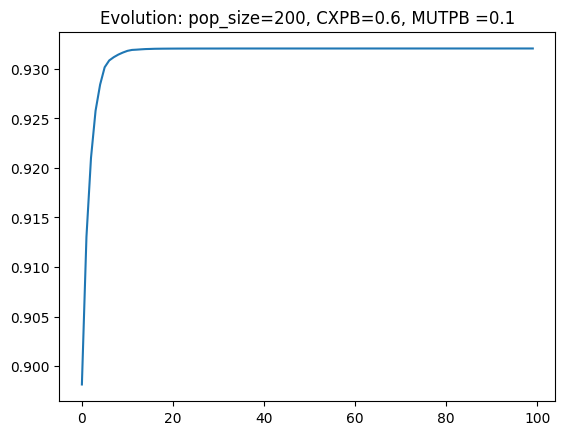

In [482]:
plt.title("Evolution: pop_size=200, CXPB=0.6, MUTPB =0.1")
plt.plot(list(i for i in range(100)),mean_max)

In [483]:
print("Best individual: ",b_elit)
print("Best score : %s " % best_score)
print("Best average score : %s" % best_avg, " on generation: ",best_gen)




Best individual:  [0.35428917051571474, 0.4040221151973781, 0.5344875153492014, 0.43731302868462085, 0.5489590484309712, 0.7036557699828279, 0.5050165463938164, 0.5630266922111545, 0.4910175997927155, 0.8082728569080657, 0.6571214448382405, 0.7342610571721393]
Best score : 0.9320665659787128 
Best average score : 0.929359165335253  on generation:  87
